# Лабораторная работа №8

|Студент| Лошманов Ю. А. |
|:-----:|:-:|
|Группа|М8О-406Б-19|

Используя схемы переменных направлений и дробных шагов, решить двумерную начально-краевую задачу для дифференциального уравнения параболического типа. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x, t)$. Исследовать зависимость погрешности от сеточных параметров $\tau, h_x, h_y$.

**Вариант 6**
$$$$
$\displaystyle\frac{\partial u}{\partial t} =  a \displaystyle\frac{\partial^2 u}{\partial x^2} + a \displaystyle\frac{\partial^2 u}{\partial y^2}$, $a > 0$
$$$$
$u(0, \: y, \: t) = \sinh (y) \exp (-3at)$
$$$$
$u_x(\frac{\pi}{4}, \: y, \: t) = -2 \sinh (y) \exp (-3at)$
$$$$
$u_y(x, \: 0, \: t) = \cos (2x) \exp (-3at)$
$$$$
$u(x, \: \ln 2, \: t) = \frac{3}{4} \cos (2x) \exp (-3at)$
$$$$
$u(x, \: y, \: 0) = \cos (2x) \sinh (y)$
$$$$
$U(x, \: y, \: t) = \cos (2x) \sinh (y) \exp (-3at)$
$$$$

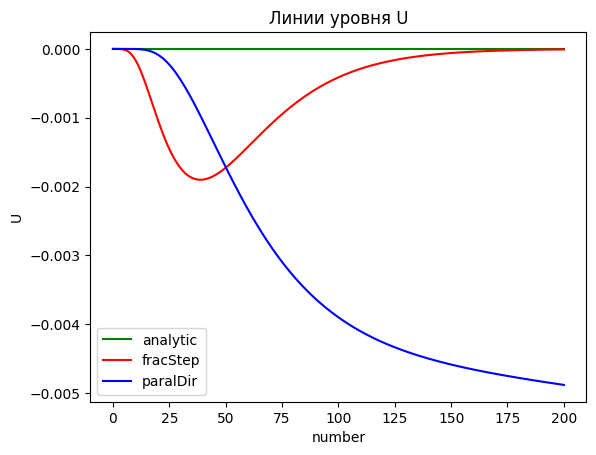

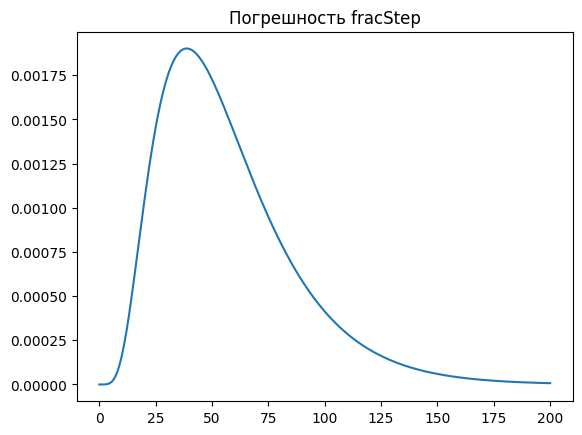

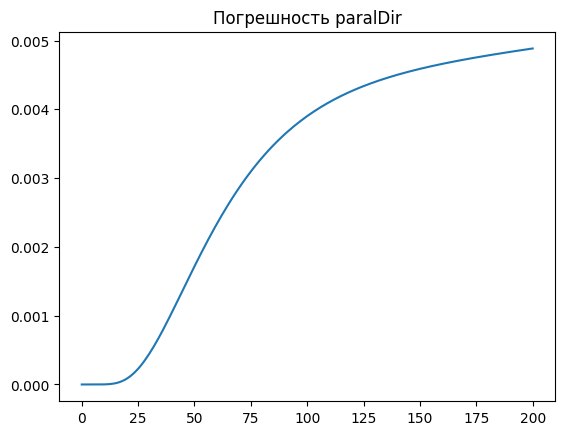

In [1]:
import numpy as np
import matplotlib.pyplot as plt

args = {
	'a': 1,
	'b': 1,
	'c': 0,
	'd': 0,
	'lx': np.pi,
	'ly': np.pi,
	'f': lambda x, y, t: 0,
	'alpha1': 0,
	'alpha2': 1,
	'beta1': 0,
	'beta2': 1,
	'gamma1': 0,
	'gamma2': 1,
	'delta1': 0,
	'delta2': 1,
	'phi11': lambda y, t: np.cos(y) * np.exp(-2 * t),
	'phi12': lambda y, t: -1 * np.cos(y) * np.exp(-2 * t),
	'phi21': lambda x, t: np.cos(x) * np.exp(-2 * t),
	'phi22': lambda x, t: -1 * np.cos(x) * np.exp(-2 * t),
	'psi': lambda x, y: np.cos(x) * np.cos(y),
	'solution': lambda x, y, t: np.cos(x) * np.cos(y) * np.exp(-2 * t)
}

def tma(a, b, c, d):
    size = len(a)
    p, q = [], []
    p.append(-c[0] / b[0])
    q.append(d[0] / b[0])

    for i in range(1, size):
        p_tmp = -c[i] / (b[i] + a[i] * p[i - 1])
        q_tmp = (d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1])
        p.append(p_tmp)
        q.append(q_tmp)

    x = [0 for _ in range(size)]
    x[size - 1] = q[size - 1]

    for i in range(size - 2, -1, -1):
        x[i] = p[i] * x[i + 1] + q[i]

    return x

class Eq:
	def __init__(self, args):
		self.a = args['a']
		self.b = args['b']
		self.c = args['c']
		self.d = args['d']
		self.lx = args['lx']
		self.ly = args['ly']
		self.f = args['f']
		self.alpha1 = args['alpha1']
		self.alpha2 = args['alpha2']
		self.beta1 = args['beta1']
		self.beta2 = args['beta2']
		self.gamma1 = args['gamma1']
		self.gamma2 = args['gamma2']
		self.delta1 = args['delta1']
		self.delta2 = args['delta2']
		self.phi11 = args['phi11']
		self.phi21 = args['phi21']
		self.phi12 = args['phi12']
		self.phi22 = args['phi22']
		self.psi = args['psi']
		self.solution = args['solution']


class Parabolic:
	def __init__(self, args, nx, ny, T, K):
		self.data = Eq(args)
		self.hx = self.data.lx / nx
		self.hy = self.data.ly / ny
		self.tau = T / K
		self.x, self.y, self.t = self.prepare(nx, ny, T, K)
		self.uu = self.init_U(self.x, self.y, self.t)

	def get_coeff(self, n):
		aa = np.zeros(len(n))
		bb = np.zeros(len(n))
		cc = np.zeros(len(n))
		dd = np.zeros(len(n))

		return aa, bb, cc, dd

	def compute_coeff(self, x, y, t2, j):
		aa, bb, cc, dd = self.get_coeff(x)
		bb[0] = self.hx * self.data.alpha2 - self.data.alpha1
		bb[-1] = self.hx * self.data.beta2 + self.data.beta1
		cc[0] = self.data.alpha1
		aa[-1] = -self.data.beta1
		dd[0] = self.data.phi11(y[j], t2) * self.hx
		dd[-1] = self.data.phi12(y[j], t2) * self.hx

		return aa, bb, cc, dd

	def prepare(self, nx, ny, T, K):
		self.hx = self.data.lx / nx
		self.hy = self.data.ly / ny
		self.tau = T / K
		x = np.arange(0, self.data.lx + self.hx, self.hx)
		y = np.arange(0, self.data.ly + self.hy, self.hy)
		t = np.arange(0, T + self.tau, self.tau)

		return x, y, t

	def init_U(self, x, y, t):
		u = np.zeros((len(x), len(y), len(t)))
		for i in range(len(x)):
			for j in range(len(y)):
				u[i][j][0] = self.data.psi(x[i], y[j])

		return u

	def analytic(self, nx, ny, T, K):
		x, y, t = self.prepare(nx, ny, T, K)

		uu = np.zeros((len(x), len(y), len(t)))

		for i in range(len(x)):
			for j in range(len(y)):
				for k in range(len(t)):
					uu[i][j][k] = self.data.solution(x[i], y[j], t[k])

		return uu

	def parallel_directions(self):
		for k in range(1, len(self.t)):
			u1 = np.zeros((len(self.x), len(self.y)))
			t2 = self.t[k] - self.tau / 2
			for j in range(len(self.y) - 1):
				aa, bb, cc, dd = self.compute_coeff(self.x, self.y, t2, j)
				for i in range(len(self.x) - 1):
					aa[i] = self.data.a - self.hx * self.data.c / 2
					bb[i] = self.hx ** 2 - 2 * (self.hx ** 2) / self.tau - 2 * self.data.a
					cc[i] = self.data.a + self.hx * self.data.c / 2
					dd[i] = -2 * (self.hx ** 2) * self.uu[i][j][k - 1] / self.tau
					- self.data.b * (self.hx ** 2) * (self.uu[i][j + 1][k - 1]
													  - 2 * self.uu[i][j][k - 1] + self.uu[i][j - 1][k - 1]) / (self.hy ** 2)
					- self.data.d * (self.hx ** 2) * (self.uu[i][j + 1][k - 1] - self.uu[i][j - 1][k - 1]) / (2 * self.hy ** 2)
					- (self.hx ** 2) * self.data.f(self.x[i], self.y[j], self.t[k])

				xx = tma(aa, bb, cc, dd)
				for i in range(len(self.x)):
					u1[i][j] = xx[i]
					u1[i][0] = (self.data.phi21(self.x[i], t2) - self.data.gamma1 * u1[i][1] / self.hy) / (
							self.data.gamma2 - self.data.gamma1 / self.hy)
					u1[i][-1] = (self.data.phi22(self.x[i], t2) + self.data.delta1 * u1[i][-2] / self.hy) / (
							self.data.delta2 + self.data.delta1 / self.hy)
			for j in range(len(self.y)):
				u1[0][j] = (self.data.phi11(self.y[j], t2) - self.data.alpha1 * u1[1][j] / self.hx) / (
							self.data.alpha2 - self.data.alpha1 / self.hx)
				u1[-1][j] = (self.data.phi12(self.y[j], t2) + self.data.beta1 * u1[-2][j] / self.hx) / (
							self.data.beta2 + self.data.beta1 / self.hx)
			####
			u2 = np.zeros((len(self.x), len(self.y)))
			for i in range(len(self.x) - 1):
				aa, bb, cc, dd = self.get_coeff(self.y)
				bb[0] = self.hy * self.data.gamma2 - self.data.gamma1
				bb[-1] = self.hy * self.data.delta2 + self.data.delta1
				cc[0] = self.data.gamma1
				aa[-1] = -self.data.delta1
				dd[0] = self.data.phi21(self.x[i], self.t[k]) * self.hy
				dd[-1] = self.data.phi22(self.x[i], self.t[k]) * self.hy

				for j in range(len(self.y) - 1):
					aa[j] = self.data.b - self.hy * self.data.d / 2
					bb[j] = self.hy ** 2 - 2 * (self.hy ** 2) / self.tau - 2 * self.data.b
					cc[j] = self.data.b + self.hy * self.data.d / 2
					dd[j] = -2 * (self.hy ** 2) * u1[i][j] / self.tau
					- self.data.a * (self.hy ** 2) * (u1[i + 1][j]
													  - 2 * u1[i][j] + u1[i - 1][j]) / (self.hx ** 2)
					- self.data.c * (self.hy ** 2) * (u1[i + 1][j] - u1[i - 1][j]) / (2 * self.hx ** 2)
					- (self.hy ** 2) * self.data.f(self.x[i], self.y[j], self.t[k])
				xx = tma(aa, bb, cc, dd)
				for j in range(len(self.y)):
					u2[i][j] = xx[j]
					u2[0][j] = (self.data.phi11(self.y[j], self.t[k]) - self.data.alpha1 * u2[1][j] / self.hx) / (
								self.data.alpha2 - self.data.alpha1 / self.hx)
					u2[-1][j] = (self.data.phi12(self.y[j], self.t[k]) + self.data.beta1 * u2[-2][j] / self.hx) / (
								self.data.beta2 + self.data.beta1 / self.hx)
			for i in range(len(self.x)):
				u2[i][0] = (self.data.phi21(self.x[i], self.t[k]) - self.data.gamma1 * u2[i][1] / self.hy) / (
							self.data.gamma2 - self.data.gamma1 / self.hy)
				u2[i][-1] = (self.data.phi22(self.x[i], self.t[k]) + self.data.delta1 * u2[i][-2] / self.hy) / (
							self.data.delta2 + self.data.delta1 / self.hy)
			for i in range(len(self.x)):
				for j in range(len(self.y)):
					self.uu[i][j][k] = u2[i][j]
		return self.uu

	def fractional_steps(self):
		for k in range(len(self.t)):
			u1 = np.zeros((len(self.x), len(self.y)))
			t2 = self.t[k] - self.tau / 2
			for j in range(len(self.y) - 1):
				aa, bb, cc, dd = self.compute_coeff(self.x, self.y, t2, j)
				for i in range(len(self.x) - 1):
					aa[i] = self.data.a
					bb[i] = -(self.hx ** 2) / self.tau - 2 * self.data.a
					cc[i] = self.data.a
					dd[i] = -(self.hx ** 2) * self.uu[i][j][k - 1] / self.tau - (self.hx ** 2) * self.data.f(self.x[i], self.y[j],
																										t2) / 2
				xx = tma(aa, bb, cc, dd)
				for i in range(len(self.x)):
					u1[i][j] = xx[i]
					u1[i][0] = (self.data.phi21(self.x[i], t2) - self.data.gamma1 * u1[i][1] / self.hy) / (
							self.data.gamma2 - self.data.gamma1 / self.hy)
					u1[i][-1] = (self.data.phi22(self.x[i], t2) + self.data.delta1 * u1[i][-2] / self.hy) / (
							self.data.delta2 + self.data.delta1 / self.hy)
			for j in range(len(self.y)):
				u1[0][j] = (self.data.phi11(self.y[j], t2) - self.data.alpha1 * u1[1][j] / self.hx) / (
						self.data.alpha2 - self.data.alpha1 / self.hx)
				u1[-1][j] = (self.data.phi12(self.y[j], t2) + self.data.beta1 * u1[-2][j] / self.hx) / (
						self.data.beta2 + self.data.beta1 / self.hx)
			#####
			u2 = np.zeros((len(self.x), len(self.y)))
			for i in range(len(self.x) - 1):
				aa, bb, cc, dd = self.get_coeff(self.y)
				bb[0] = self.hy * self.data.gamma2 - self.data.gamma1
				bb[-1] = self.hy * self.data.delta2 + self.data.delta1
				cc[0] = self.data.gamma1
				aa[-1] = -self.data.delta1
				dd[0] = self.data.phi21(self.x[i], self.t[k]) * self.hy
				dd[-1] = self.data.phi22(self.x[i], self.t[k]) * self.hy

				for j in range(len(self.y) - 1):
					aa[j] = self.data.b
					bb[j] = -(self.hy ** 2) / self.tau - 2 * self.data.b
					cc[j] = self.data.b
					dd[j] = -(self.hy ** 2) * u1[i][j] / self.tau - (self.hy ** 2) * self.data.f(self.x[i], self.y[j], self.t[k]) / 2
				xx = tma(aa, bb, cc, dd)
				for j in range(len(self.y)):
					u2[i][j] = xx[j]
					u2[0][j] = (self.data.phi11(self.y[j], self.t[k]) - self.data.alpha1 * u2[1][j] / self.hx) / (
							self.data.alpha2 - self.data.alpha1 / self.hx)
					u2[-1][j] = (self.data.phi12(self.y[j], self.t[k]) + self.data.beta1 * u2[-2][j] / self.hx) / (
							self.data.beta2 + self.data.beta1 / self.hx)
			for i in range(len(self.x)):
				u2[i][0] = (self.data.phi21(self.x[i], self.t[k]) - self.data.gamma1 * u2[i][1] / self.hy) / (
						self.data.gamma2 - self.data.gamma1 / self.hy)
				u2[i][-1] = (self.data.phi22(self.x[i], self.t[k]) + self.data.delta1 * u2[i][-2] / self.hy) / (
						self.data.delta2 + self.data.delta1 / self.hy)
			for i in range(len(self.x)):
				for j in range(len(self.y)):
					self.uu[i][j][k] = u2[i][j]
		return self.uu

def show(dict_, data, args, y_point, time):
  plt.title('Линии уровня U')
  plt.plot(dict_['analytic'][time][y_point], color='g', label='analytic')
  plt.plot(dict_['fracStep'][time][y_point], color='r', label='fracStep')
  plt.plot(dict_['paralDir'][time][y_point], color='b', label='paralDir')
  plt.legend(loc='best')
  plt.ylabel('U')
  plt.xlabel('number')
  plt.show()


  plt.title('Погрешность fracStep')
  plt.plot(abs(dict_['analytic'][time][y_point] - dict_['fracStep'][time][y_point]))
  plt.show()


  plt.title('Погрешность paralDir')
  plt.plot(abs(dict_['analytic'][time][y_point] - dict_['paralDir'][time][y_point]))
  plt.show()


data = {'nx': 40, 'ny': 40, 'T': 5, 'K': 200}
nx, ny, T, K = int(data['nx']), int(data['ny']), int(data['T']), int(data['K'])

solver = Parabolic(args, nx, ny, T, K)
solverFrac = Parabolic(args, nx, ny, T, K)
solverParal = Parabolic(args, nx, ny, T, K)
ans = {
	'fracStep': solverFrac.fractional_steps(),
	'paralDir': solverParal.parallel_directions(),
	'analytic': solver.analytic(nx, ny, T, K)
}

show(ans, data, args, 20, 20)

## Исследование зависимости погрешности от параметров tau, hx, hy

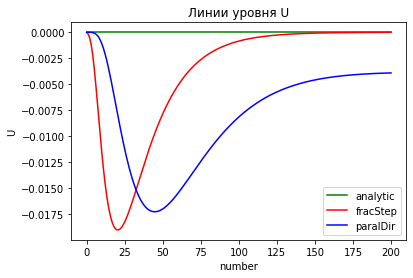

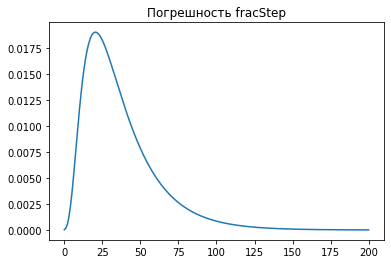

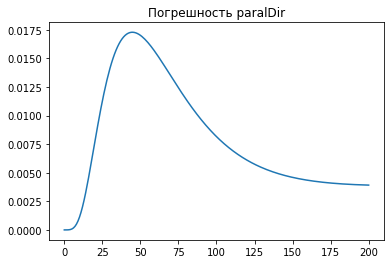

In [3]:
data = {'nx': 80, 'ny': 40, 'T': 5, 'K': 200}
nx, ny, T, K = int(data['nx']), int(data['ny']), int(data['T']), int(data['K'])

solver = Parabolic(args, nx, ny, T, K)
solverFrac = Parabolic(args, nx, ny, T, K)
solverParal = Parabolic(args, nx, ny, T, K)
ans = {
	'fracStep': solverFrac.fractional_steps(),
	'paralDir': solverParal.parallel_directions(),
	'analytic': solver.analytic(nx, ny, T, K)
}

show(ans, data, args, 20, 20)

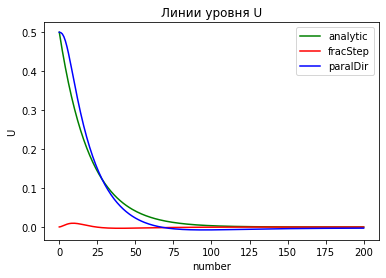

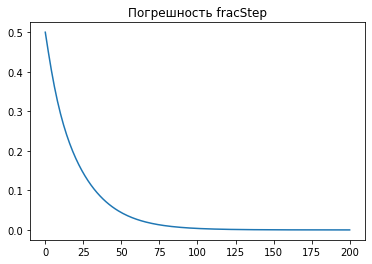

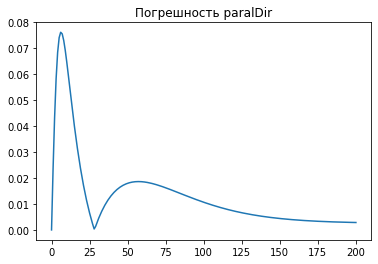

In [4]:
data = {'nx': 80, 'ny': 80, 'T': 5, 'K': 200}
nx, ny, T, K = int(data['nx']), int(data['ny']), int(data['T']), int(data['K'])

solver = Parabolic(args, nx, ny, T, K)
solverFrac = Parabolic(args, nx, ny, T, K)
solverParal = Parabolic(args, nx, ny, T, K)
ans = {
	'fracStep': solverFrac.fractional_steps(),
	'paralDir': solverParal.parallel_directions(),
	'analytic': solver.analytic(nx, ny, T, K)
}

show(ans, data, args, 20, 20)

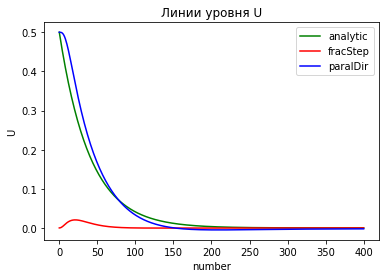

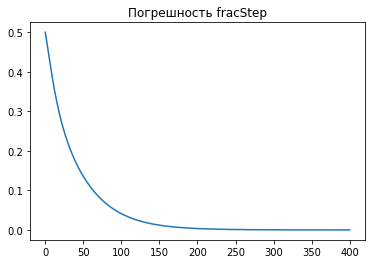

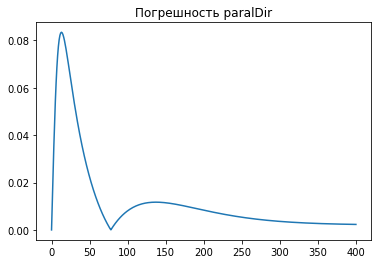

In [5]:
data = {'nx': 80, 'ny': 80, 'T': 5, 'K': 400}
nx, ny, T, K = int(data['nx']), int(data['ny']), int(data['T']), int(data['K'])


solver = Parabolic(args, nx, ny, T, K)
solverFrac = Parabolic(args, nx, ny, T, K)
solverParal = Parabolic(args, nx, ny, T, K)
ans = {
	'fracStep': solverFrac.fractional_steps(),
	'paralDir': solverParal.parallel_directions(),
	'analytic': solver.analytic(nx, ny, T, K)
}

show(ans, data, args, 20, 20)

## Выводы:
По показателям можно понять, что при увелечении $h_x$ и $h_y$ погрешность сначала падает, но после какого-то значения начинает расти, при этом мелкость $\tau$ не оказывает сильного влияния на погрешность